In [1]:
from obspy import read, Stream
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import numpy as np
import os

In [2]:
#Getting the chosen data

MOIG_BHZ_Y = read("Data/MX_MOIG_BHZ_2023-01-01_2024-01-01.mseed")
TLIG_BHZ_Y = read("Data/MX_TLIG_BHZ_2023-01-01_2024-01-01.mseed")

In [3]:
MOIG_BHZ_Y.print_gaps()

Source            Last Sample                 Next Sample                 Delta           Samples 
MX.MOIG..BHZ      2023-01-21T17:21:42.785001Z 2023-01-21T17:22:06.355000Z 23.519999       470     
MX.MOIG..BHZ      2023-01-23T14:25:48.805000Z 2023-01-23T14:26:37.495000Z 48.640000       973     
MX.MOIG..BHZ      2023-01-23T14:27:21.995000Z 2023-01-23T14:31:25.105000Z 243.060000      4861    
MX.MOIG..BHZ      2023-01-23T14:32:12.305000Z 2023-01-23T14:36:17.295000Z 244.940000      4899    
MX.MOIG..BHZ      2023-01-23T14:37:07.245000Z 2023-01-23T14:41:06.245000Z 238.950000      4779    
MX.MOIG..BHZ      2023-01-23T14:41:51.195000Z 2023-01-23T14:44:03.845000Z 132.600000      2652    
MX.MOIG..BHZ      2023-02-03T22:13:27.645000Z 2023-02-07T19:58:35.695000Z 337508.000000   6750160 
MX.MOIG..BHZ      2023-02-13T14:01:47.195000Z 2023-02-13T14:03:00.475000Z 73.230000       1465    
MX.MOIG..BHZ      2023-02-13T14:03:42.275000Z 2023-02-13T14:04:32.204999Z 49.879999       998     
MX.MOIG..B

In [4]:
TLIG_BHZ_Y.print_gaps()

Source            Last Sample                 Next Sample                 Delta           Samples 
MX.TLIG..BHZ      2023-01-17T21:33:42.083394Z 2023-01-17T21:36:22.973393Z 160.839999      3217    
MX.TLIG..BHZ      2023-01-17T21:37:40.323393Z 2023-01-17T21:40:53.093393Z 192.720000      3854    
MX.TLIG..BHZ      2023-01-17T21:42:14.143393Z 2023-01-17T21:44:46.613393Z 152.420000      3048    
MX.TLIG..BHZ      2023-01-17T21:46:10.763393Z 2023-01-17T21:48:40.283393Z 149.470000      2989    
MX.TLIG..BHZ      2023-01-17T21:50:03.283393Z 2023-01-17T21:52:42.183393Z 158.850000      3177    
MX.TLIG..BHZ      2023-01-17T21:54:00.833393Z 2023-01-17T21:56:20.723393Z 139.840000      2797    
MX.TLIG..BHZ      2023-01-17T21:57:38.273393Z 2023-01-17T21:59:33.043393Z 114.720000      2294    
MX.TLIG..BHZ      2023-01-17T22:00:49.793393Z 2023-01-17T22:03:05.743393Z 135.900000      2718    
MX.TLIG..BHZ      2023-01-17T22:04:24.693393Z 2023-01-17T22:06:52.083393Z 147.340000      2947    
MX.TLIG..B

In [5]:
#Discovered print_gap after doing this part
#Measuring the gaps in time for MOIG_BHZ_Y
#gaps_MOIG_BHZ_Y = MOIG_BHZ_Y.get_gaps()

# Count and measure gaps
def measure_gaps(st):
    """
    Measure and print the number and lengths of gaps in a given ObsPy Stream object.

    This function identifies gaps in the provided ObsPy Stream object, counts the number of gaps,
    and calculates the length of each gap in seconds. It then prints the number of gaps and their lengths
    in seconds.

    :param st: ObsPy Stream object containing the seismic data.
    :type st: obspy.core.stream.Stream
    :return: None"""
    gaps = st.get_gaps()
    num_gaps = len(gaps)
    gap_lengths = [gap[6] for gap in gaps]  # gap[6] is the length of the gap in seconds

    # Print the results
    print(f"Number of gaps: {num_gaps}")
    print(f"Lengths of gaps: {gap_lengths}")
    return

In [6]:
def get_longest_uninterrupted_segment(st):
     # Identify the longest uninterrupted segment
    longest_trace = max(st, key=lambda tr: tr.stats.endtime - tr.stats.starttime)
    
    # Extract the data
    data = longest_trace.data
    start_time = longest_trace.stats.starttime
    end_time = longest_trace.stats.endtime
    seconds_between = end_time - start_time
    # Convert the time difference to days
    days_between = seconds_between / (24 * 3600)
    return data, start_time, end_time, days_between


In [7]:
measure_gaps(MOIG_BHZ_Y)

Number of gaps: 409
Lengths of gaps: [23.519999027252197, 48.640000343322754, 243.05999994277954, 244.94000029563904, 238.95000004768372, 132.59999990463257, 337508.0000002384, 73.23000001907349, 49.87999892234802, 70.31000113487244, 230.78000020980835, 28.420000314712524, 112.44000029563904, 223.78000020980835, 200.5200002193451, 196.61999988555908, 76.2000002861023, 70.35999989509583, 1580.4500000476837, 127.50000023841858, 35.950000047683716, 67.25, 26.380000114440918, 115.0700011253357, 105.61999893188477, 45.0699999332428, 18.829999923706055, 166.55000114440918, 219.4999988079071, 220.85999989509583, 238.75, 229.1599998474121, 241.03000020980835, 212.0200002193451, 76.10999989509583, 57.8800003528595, 58.31000018119812, 280.53000020980835, 290.28000020980835, 88.80999994277954, 41.049999952316284, 407.15000009536743, 76.15000009536743, 162296.95000004768, 112.09000086784363, 319.18999910354614, 88.20000004768372, 33.549999952316284, 59.170000076293945, 222.80000114440918, 230.4599

In [8]:
get_longest_uninterrupted_segment(MOIG_BHZ_Y)

(array([-484, -786, -406, ..., -276,    3, -110]),
 2023-05-09T15:01:53.625000Z,
 2023-06-09T15:25:42.425000Z,
 31.016537037037036)

In [9]:
measure_gaps(TLIG_BHZ_Y)

Number of gaps: 1195
Lengths of gaps: [160.839998960495, 192.71999979019165, 152.41999983787537, 149.47000002861023, 158.85000014305115, 139.8400001525879, 114.72000026702881, 135.90000009536743, 147.3400001525879, 158.46000027656555, 205.60000014305115, 181.1600000858307, 185.15000009536743, 153.42000007629395, 75.71999979019165, 299.7200002670288, 266.22000002861023, 27.580000162124634, 337483.59999990463, 30.84999990463257, 1615.6500000953674, 34.64999985694885, 145.75, 159.7900002002716, 50.890000104904175, 28.300000190734863, 408.2500002384186, 68.84999990463257, 162301.30000138283, 341.4899990558624, 345.7500002384186, 343.30000019073486, 355.75, 289.69000005722046, 165.43999981880188, 46.22000026702881, 11.200000286102295, 9.200000286102295, 13.200000286102295, 62.200000286102295, 13767.200000286102, 167.17000007629395, 307.9300000667572, 300.25, 312.72000002861023, 298.26000022888184, 304.1300001144409, 307.8600001335144, 292.6899981498718, 304.40000200271606, 313.210000038147,

In [10]:
get_longest_uninterrupted_segment(TLIG_BHZ_Y)

(array([1806, 1846, 1886, ...,  792,  721,  731]),
 2023-01-01T00:00:00.033394Z,
 2023-01-17T21:33:42.083394Z,
 16.89840335648148)

In [11]:
#Filling the missing data
test = MOIG_BHZ_Y.copy()
filled_test =  test.merge(method=1, fill_value='interpolate')
measure_gaps(filled_test)

Number of gaps: 0
Lengths of gaps: []


In [12]:
get_longest_uninterrupted_segment(filled_test)

(array([-254, -333, -293, ..., -432, -335, -373]),
 2023-01-01T00:00:00.035001Z,
 2023-12-31T23:59:59.985001Z,
 364.9999994212963)

In [13]:
#print(MOIG_BHZ_Y.traces)
#print(MOIG_BHZ_Y[0])
MOIG_BHZ_Y[0].stats.sampling_rate

20.0

In [14]:
#Lets try filling only shorter gaps

def fill_gaps(st, max_gap_length):
    """
    Fill gaps in a stream object up to a maximum length.
    
    :param stream: ObsPy Stream object
    :param max_gap_length: Maximum gap length in seconds to fill
    :return: Stream object with gaps filled
    """
    filled_st = st.copy()
    sampling_rate = filled_st[0].stats.sampling_rate
    max_interpolation_samples = int(max_gap_length * sampling_rate)
  
    filled_st.merge(method=0, fill_value='interpolate', interpolation_samples=max_interpolation_samples)
    return filled_st

def evaluate_fill(st, max_gap_length):
    filled_st = fill_gaps(st, max_gap_length)
    #get_longest_uninterrupted_segment(filled_st)
    return get_longest_uninterrupted_segment(filled_st), measure_gaps(filled_st)
    

In [15]:
st = MOIG_BHZ_Y
max_gap_length = 20
filled_MOIG_BHZ_Y = fill_gaps(st, max_gap_length)
measure_gaps(filled_MOIG_BHZ_Y)

Number of gaps: 0
Lengths of gaps: []


In [16]:

st = TLIG_BHZ_Y
max_gap_length = 20
filled_TLIG_BHZ_Y = fill_gaps(st, max_gap_length)
measure_gaps(filled_TLIG_BHZ_Y)

Number of gaps: 0
Lengths of gaps: []


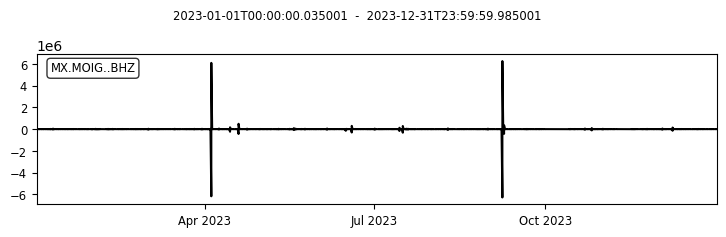

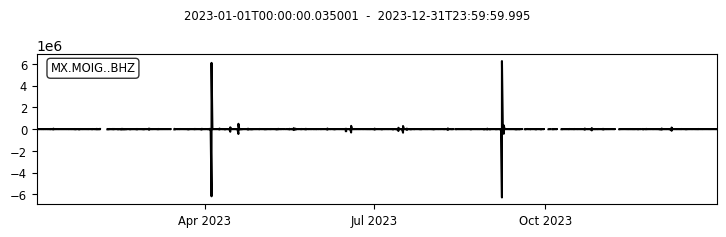

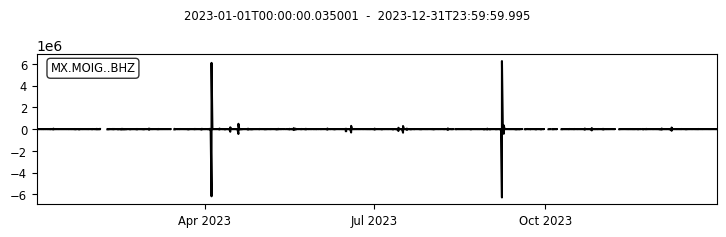

In [17]:
#Since filling only part of the gap did not work, let's compare the original data with the filled to see if we can still 
#use it as a starting point

filled_MOIG_BHZ_Y.plot()
MOIG_BHZ_Y.plot()

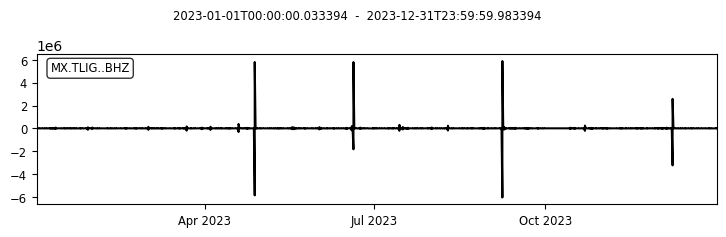

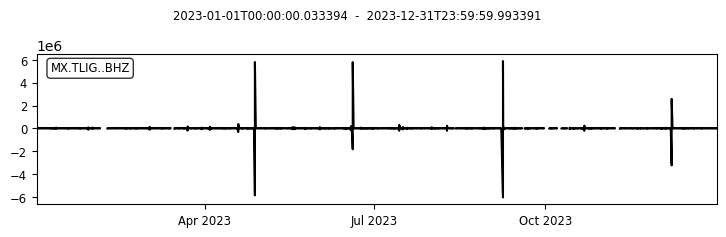

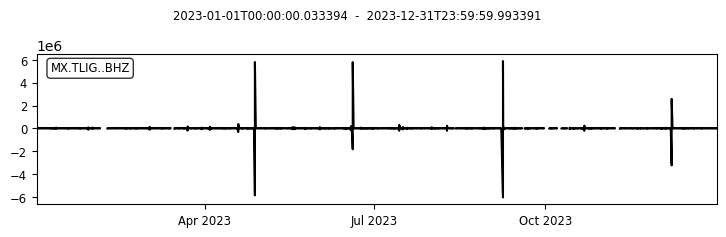

In [19]:
filled_TLIG_BHZ_Y.plot()
TLIG_BHZ_Y.plot()

In [22]:
filled_TLIG_BHZ_Y.write('filled_TLIG_BHZ_Y.mseed', format='MSEED')
filled_MOIG_BHZ_Y.write('filled_MOIG_BHZ_Y.mseed', format='MSEED')

OSError: exception: access violation writing 0x0000000000000020

In [33]:
filled_TLIG_BHZ_Y.write("filled_TLIG_BHZ_Y.mseed", format='MSEED', encoding = 'STEIM2')

OSError: exception: access violation writing 0x0000000000000020

In [32]:
#print (filled_TLIG_BHZ_Y.info)
print(filled_TLIG_BHZ_Y)  

print(filled_TLIG_BHZ_Y[0].stats)

1 Trace(s) in Stream:
MX.TLIG..BHZ | 2023-01-01T00:00:00.033394Z - 2023-12-31T23:59:59.983394Z | 20.0 Hz, 630720000 samples
         network: MX
         station: TLIG
        location: 
         channel: BHZ
       starttime: 2023-01-01T00:00:00.033394Z
         endtime: 2023-12-31T23:59:59.983394Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 630720000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 62268, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 660811264})


In [3]:
test_MOIG_BHZ_Y =  MOIG_BHZ_Y.merge(method=1, fill_value='interpolate')

In [10]:
from obspy import Trace
test_MOIG_BHZ_Y[0].stats

         network: MX
         station: MOIG
        location: 
         channel: BHZ
       starttime: 2023-01-01T00:00:00.035001Z
         endtime: 2023-12-31T23:59:59.985001Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 630720000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 113159, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 962589696})

In [4]:
test_MOIG_BHZ_Y.write("test_MOIG_BHZ_Y.mseed", format='MSEED', eclen = 512)
#, encoding = 'STEIM2'

OSError: exception: access violation writing 0x0000000000000020

In [ ]:
st1 = MOIG_BHZ_Y
tr1 = st1[0]
st2 = filled_MOIG_BHZ_Y
tr2 = st2[0]
#tr3 = tr2.copy()
#tr3.data = tr2.data - tr1.data


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot each trace with a different color
ax.plot(tr1.times("matplotlib"), tr1.data, "b-", label='Trace 1')
ax.plot(tr2.times("matplotlib"), tr2.data, "g-", label='Trace 2')
#ax.plot(tr3.times("matplotlib"), tr3.data, "r-", label='Trace 3')

# Format the x-axis as dates
ax.xaxis_date()
fig.autofmt_xdate()

# Add a legend to differentiate the traces
ax.legend()

plt.show()

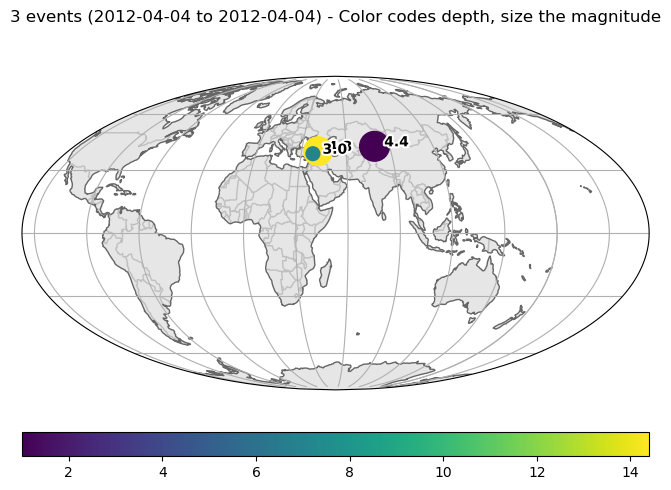

In [23]:
import obspy
fig = obspy.read_events().plot()

In [24]:
df = [1,2,3]

df.to_csv("data.csv")

AttributeError: 'list' object has no attribute 'to_csv'

In [25]:
from __future__ import print_function

import numpy as np
from obspy import UTCDateTime, read, Trace, Stream


weather = """
00.0000 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000000
00.0002 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000001
00.0005 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000002
00.0008 0.0 ??? 4.7 97.7 1015.4 0.0 010308 000003
00.0011 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000004
00.0013 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000005
00.0016 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000006
00.0019 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000007
"""

# Convert to NumPy character array
data = np.fromstring(weather, dtype='|S1')

# Fill header attributes
stats = {'network': 'BW', 'station': 'RJOB', 'location': '',
         'channel': 'WLZ', 'npts': len(data), 'sampling_rate': 0.1,
         'mseed': {'dataquality': 'D'}}
# set current time
stats['starttime'] = UTCDateTime()
st = Stream([Trace(data=data, header=stats)])
# write as ASCII file (encoding=0)
st.write("weather.mseed", format='MSEED', encoding=0, reclen=256)

# Show that it worked, convert NumPy character array back to string
st1 = read("weather.mseed")
print(st1[0].data.tobytes())

b'\n00.0000 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000000\n00.0002 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000001\n00.0005 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000002\n00.0008 0.0 ??? 4.7 97.7 1015.4 0.0 010308 000003\n00.0011 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000004\n00.0013 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000005\n00.0016 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000006\n00.0019 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000007\n'


C:\Users\User\AppData\Local\Temp\ipykernel_2012\211006520.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(weather, dtype='|S1')
